**הכללה של סיפריות של פעולות עם בסיסי נתונים וטעינת נתונים מהקובץ לאחר מכן נבצע קידוד מכיוון שהפורמט לא התאים לנו ונסננן את כל הנתונים עם צ'ק אאוטים בלבד** 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = r'C:\Users\danie\OneDrive\Documents\פרוייקט גמר בניתוח נתונים\reservationsN.csv'


data = pd.read_csv(file_path, encoding='utf-8')


check_outs = data[data['stat'] == 'Check-Out']


**נגדיר תתי קטגוריות למספרי הסוכנים בשביל מראה נקי יותר וטווחים של סוכנים בצורה מדוייקת יותר** 

In [3]:

def categorize_agent(agent_number):
    # לדוגמה: קטגוריה על פי עשרות מספר הסוכן
    if agent_number <= 100:
        return 'Agents 1-100'
    elif 100 < agent_number <= 200:
        return 'Agents 101-200'
    else:
        return 'Agents 201 and above'


**מחליפים את המספרים של סוכנויות בקטגוריות שלהם לאחר מכן נקבץ את הנתונים של הסוכנים ונספור צ'ק אאוטים ונמיין את מספרי הצ'ק אאוטים מהגבוהה לנמוך**

In [4]:

check_outs['AgentCategory'] = check_outs['agentNr'].apply(categorize_agent)


agent_checkouts = check_outs.groupby('AgentCategory').size().reset_index(name='Number_of_Checkouts')


agent_checkouts = agent_checkouts.sort_values(by='Number_of_Checkouts', ascending=False)


C:\Users\danie\AppData\Local\Temp\ipykernel_22896\3508762567.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check_outs['AgentCategory'] = check_outs['agentNr'].apply(categorize_agent)


**יצירת גרף עמודות והוספת תוויות ישירות על הגרף**

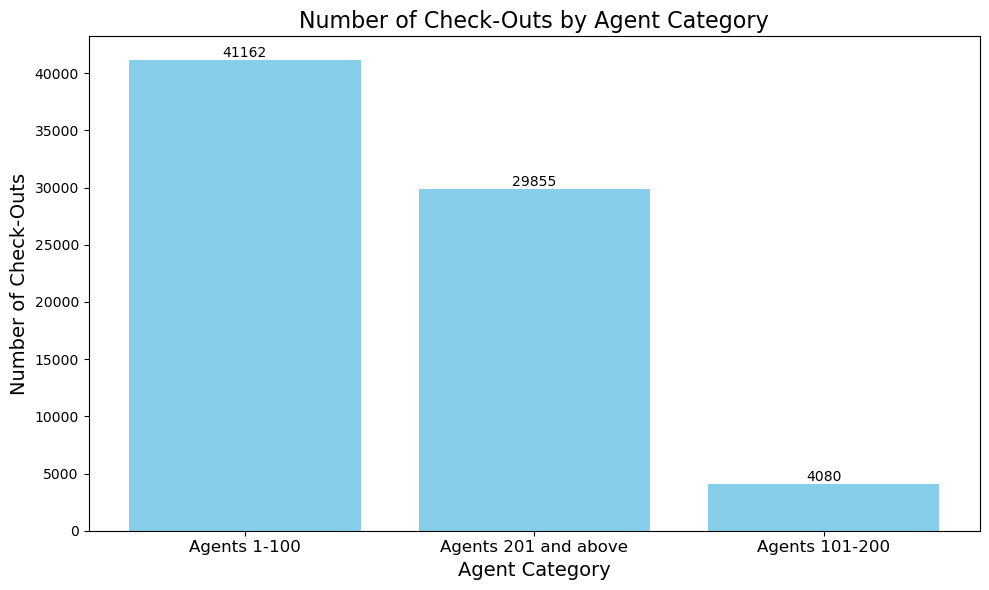

In [5]:

plt.figure(figsize=(10, 6))
bars = plt.bar(agent_checkouts['AgentCategory'], agent_checkouts['Number_of_Checkouts'], color='skyblue')
plt.title('Number of Check-Outs by Agent Category', fontsize=16)
plt.xlabel('Agent Category', fontsize=14)
plt.ylabel('Number of Check-Outs', fontsize=14)
plt.xticks(rotation=0, ha='center', fontsize=12)  # הסיבוב של תוויות הציר
plt.tight_layout()


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, int(yval), ha='center', va='bottom', fontsize=10)

plt.show()